In [309]:
import os
import numpy as np
import pandas as pd

In [310]:
os.listdir(os.getcwd())

['axial_t1wce_2_class',
 'brain-mri-classification-object-detection.ipynb',
 'coronal_t1wce_2_class',
 'models',
 'sagittal_t1wce_2_class',
 'test_labels.csv',
 'test_labels_noscale.csv',
 'train_labels.csv',
 'train_labels_noscale.csv']

In [311]:
axialdata = os.path.join(os.getcwd(), "axial_t1wce_2_class")
axiallabels_train = os.path.join(axialdata, r"labels\train")
# os.path.exists(axiallabels_train)
# os.listdir(axiallabels_train)
axiallabels_test = os.path.join(axialdata, r"labels\test")
axial_labels_train = os.listdir(axiallabels_train)
axial_labels_test = os.listdir(axiallabels_test)

In [312]:
coronaldata = os.path.join(os.getcwd(), "coronal_t1wce_2_class")
coronallabels_train = os.path.join(coronaldata, r"labels\train")
# os.path.exists(coronallabels_train)
# os.listdir(coronallabels_train)
coronallabels_test = os.path.join(coronaldata, r"labels\test")
coronal_labels_train = os.listdir(coronallabels_train)
coronal_labels_test = os.listdir(coronallabels_test)

In [313]:
sagittaldata = os.path.join(os.getcwd(), "sagittal_t1wce_2_class")
sagittallabels_train = os.path.join(sagittaldata, r"labels\train")
# os.path.exists(saggitallabels_train)
# os.listdir(saggitallabels_train)
sagittallabels_test = os.path.join(sagittaldata, r"labels\test")
sagittal_labels_train = os.listdir(sagittallabels_train)
sagittal_labels_test = os.listdir(sagittallabels_test)

In [314]:
# class means whether the tumor is drug resistant or not
# the coordinates are normalized with yolo format
train_labels = {
    "ID": [],
    "class": [],
    "x_cent": [],
    "y_cent": [],
    "width": [],
    "height": [],
    "plane": [],
    "path2img": [],
}

test_labels = {
    "ID": [],
    "class": [],
    "x_cent": [],
    "y_cent": [],
    "width": [],
    "height": [],
    "plane": [],
    "path2img": [],
}
for x, y, z in zip(
    [axial_labels_train, coronal_labels_train, sagittal_labels_train],
    [axiallabels_train, coronallabels_train, sagittallabels_train],
    ["axial", "coronal", "sagittal"],
):
    for train in x:
        path_train = os.path.join(y, train)
        with open(path_train, "r") as train_file:
            content = train_file.read()
            train_labels["ID"].append(train[:-4])
            train_labels["class"].append(int(content.split()[0]))
            train_labels["x_cent"].append(float(content.split()[1]))
            train_labels["y_cent"].append(float(content.split()[2]))
            train_labels["width"].append(float(content.split()[3]))
            train_labels["height"].append(float(content.split()[4]))
            train_labels["plane"].append(z)
            train_labels["path2img"].append(
                path_train.replace("labels", "images").replace("txt", "jpg")
            )

for x, y, z in zip(
    [axial_labels_test, coronal_labels_test, sagittal_labels_test],
    [axiallabels_test, coronallabels_test, sagittallabels_test],
    ["axial", "coronal", "sagittal"],
):
    for test in x:
        path_test = os.path.join(y, test)
        with open(path_test, "r") as test_file:
            content = test_file.read()
            test_labels["ID"].append(test[:-4])
            test_labels["class"].append(int(content.split()[0]))
            test_labels["x_cent"].append(float(content.split()[1]))
            test_labels["y_cent"].append(float(content.split()[2]))
            test_labels["width"].append(float(content.split()[3]))
            test_labels["height"].append(float(content.split()[4]))
            test_labels["plane"].append(z)
            test_labels["path2img"].append(
                path_test.replace("labels", "images").replace("txt", "jpg")
            )

In [315]:
train_labels_df = pd.DataFrame(train_labels)
test_labels_df = pd.DataFrame(test_labels)
test_labels_df.head(15)

,ID,class,x_cent,y_cent,width,height,plane,path2img
0,00018_101,0,0.610915,0.661385,0.167840,0.134977,axial,c:\Users\ologa\Documents\machine-learning-zoom...
1,00018_109,0,0.611502,0.534624,0.154930,0.078638,axial,c:\Users\ologa\Documents\machine-learning-zoom...
2,00018_111,0,0.613850,0.528756,0.140845,0.073944,axial,c:\Users\ologa\Documents\machine-learning-zoom...
3,00018_117,0,0.602700,0.619131,0.184272,0.240610,axial,c:\Users\ologa\Documents\machine-learning-zoom...
4,00018_121,0,0.598592,0.622066,0.171362,0.241784,axial,c:\Users\ologa\Documents\machine-learning-zoom...
5,00018_126,0,0.601526,0.616784,0.170188,0.221831,axial,c:\Users\ologa\Documents\machine-learning-zoom...
6,00018_134,0,0.591549,0.650822,0.091549,0.102113,axial,c:\Users\ologa\Documents\machine-learning-zoom...
7,00019_66,0,0.634977,0.513498,0.089202,0.090376,axial,c:\Users\ologa\Documents\machine-learning-zoom...
8,00019_75,0,0.521127,0.472418,0.103286,0.073944,axial,c:\Users\ologa\Documents\machine-learning-zoom...
9,00019_84,0,0.625587,0.510563,0.051643,0.044601,axial,c:\Users\ologa\Documents\machine-learning-zoom...


In [316]:
# to store the labels into one csv file
train_labels_df.to_csv(r"train_labels.csv")
test_labels_df.to_csv(r"test_labels.csv")

In [317]:
test_labels_df.tail()

,ID,class,x_cent,y_cent,width,height,plane,path2img
218,00053_85,0,0.228286,0.445423,0.062207,0.050469,sagittal,c:\Users\ologa\Documents\machine-learning-zoom...
219,00054_107,1,0.353286,0.356808,0.185446,0.192488,sagittal,c:\Users\ologa\Documents\machine-learning-zoom...
220,00054_126,1,0.341549,0.345657,0.246479,0.205399,sagittal,c:\Users\ologa\Documents\machine-learning-zoom...
221,00054_88,1,0.321596,0.390258,0.061033,0.095070,sagittal,c:\Users\ologa\Documents\machine-learning-zoom...
222,00061_89,0,0.548709,0.501761,0.048122,0.041080,sagittal,c:\Users\ologa\Documents\machine-learning-zoom...


c:\Users\ologa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ologa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ologa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ologa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='x_cent', ylabel='y_cent'>

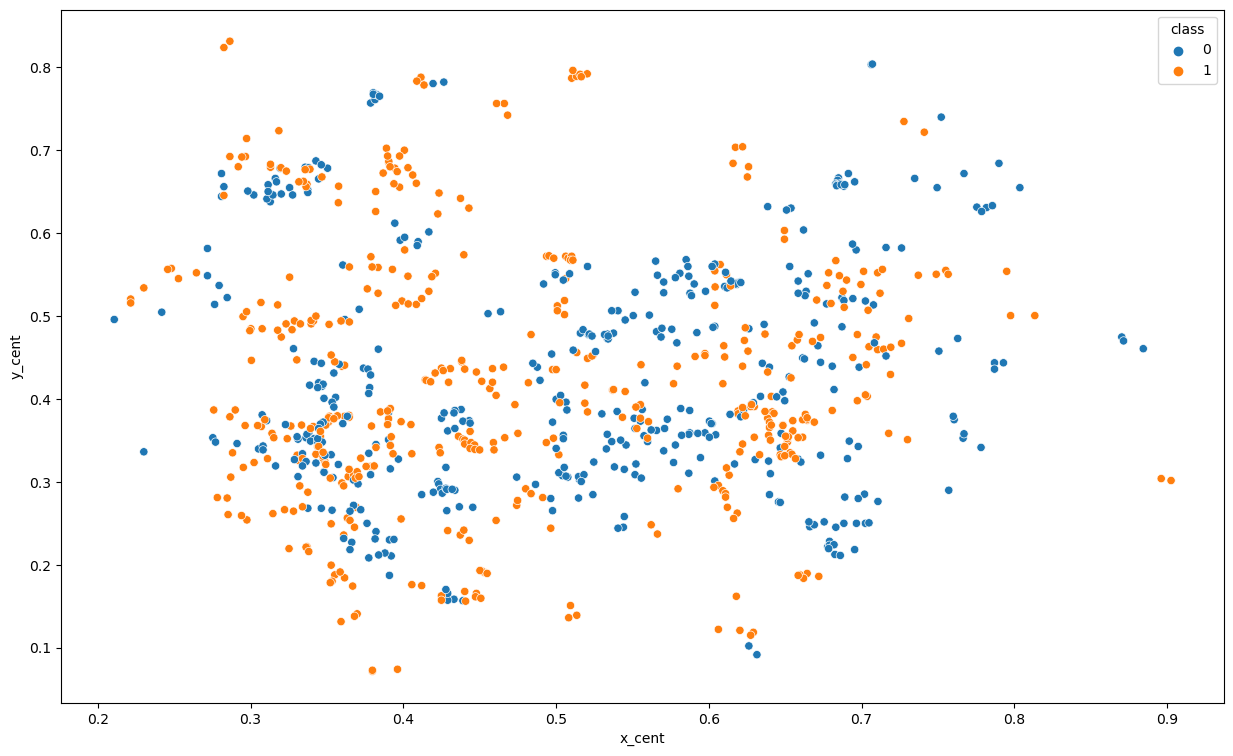

In [318]:
import seaborn as sns

%matplotlib inline

sns.scatterplot(
    x=train_labels_df["x_cent"],
    y=train_labels_df["y_cent"],
    hue=train_labels_df["class"],
)

class
1    0.522779
0    0.477221
Name: proportion, dtype: float64


<Axes: title={'center': 'Class'}, xlabel='class'>

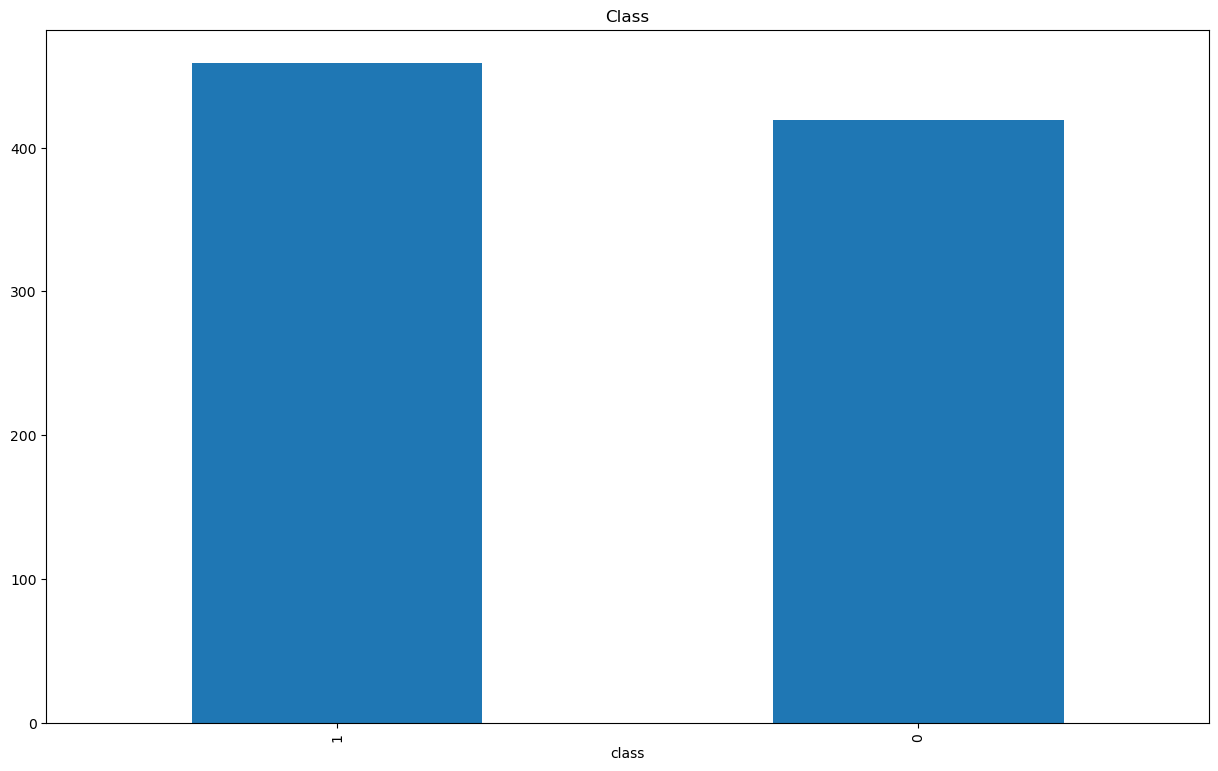

In [319]:
print(train_labels_df["class"].value_counts(normalize=True))
train_labels_df["class"].value_counts().plot(kind="bar", title="Class")

plane
coronal     0.362187
axial       0.337130
sagittal    0.300683
Name: proportion, dtype: float64


<Axes: title={'center': 'Planes'}, ylabel='count'>

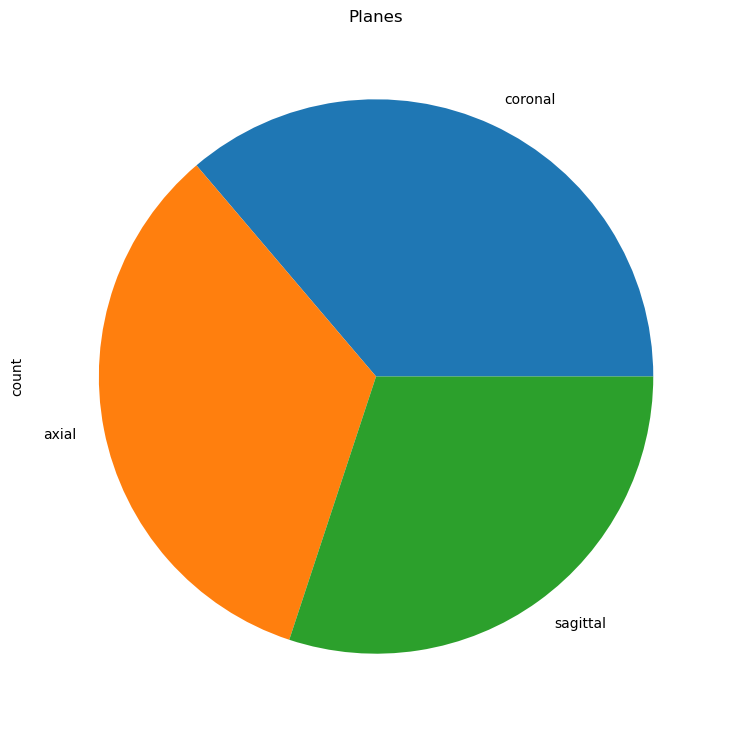

In [320]:
print(train_labels_df["plane"].value_counts(normalize=True))
train_labels_df["plane"].value_counts().plot(kind="pie", title="Planes")

In [321]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

# fix random seed
np.random.seed(2023)

In [322]:
plt.rcParams["figure.figsize"] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)
nrows, ncols = 2, 3

<Figure size 1500x900 with 0 Axes>

In [323]:
imgName = train_labels_df["ID"]
ids = train_labels_df.index
rndIds = np.random.choice(ids, nrows * ncols)
print(rndIds)

[855 537 454 695 732 515]


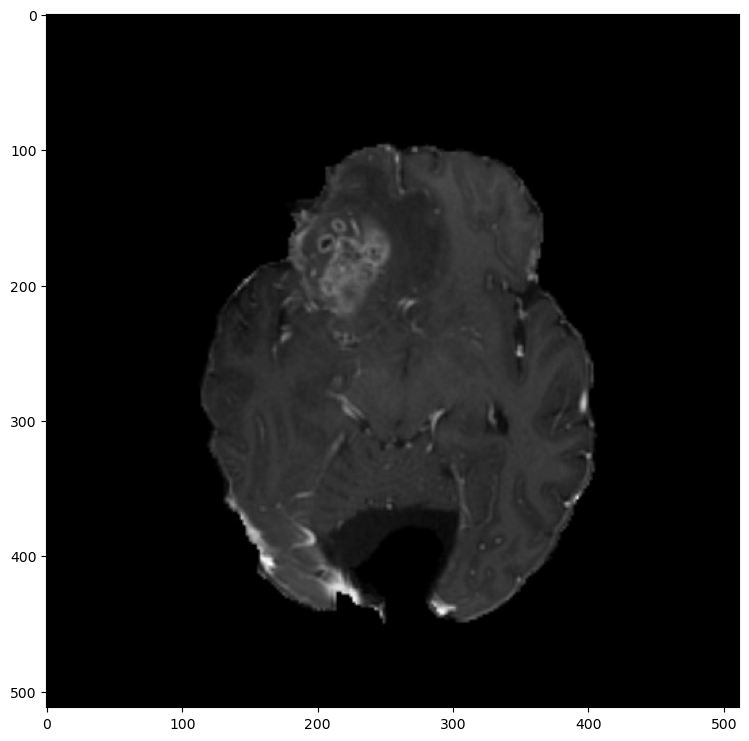

In [324]:
# to check some items by hand on images
img = Image.open(
    os.path.join(axialdata, r"images/train", train_labels_df["ID"][0] + ".jpg")
)
img_arr = np.array(img)
plt.imshow(img_arr, cmap="gray")
# npr = np.array(img)
# npr.shape
# by some random checking it was found that the size of the images are different

In [325]:
# helper function to load images
def load_img_label(labels_df, id_):
    imgName = labels_df["ID"]

    planedict = {
        "axial": axialdata,
        "coronal": coronaldata,
        "sagittal": sagittaldata,
    }
    img = Image.open(
        os.path.join(
            planedict[labels_df["plane"].loc[id_]],
            r"images/train",
            imgName[id_] + ".jpg",
        )
    )
    # since the coordinates are the normalized coordinates, so they should be
    # multiplied by the size of the image to be converted to the real ones
    x_size, y_size = img.size
    x = labels_df["x_cent"][id_] * x_size
    y = labels_df["y_cent"][id_] * y_size
    w = labels_df["width"][id_] * x_size
    h = labels_df["height"][id_] * y_size
    p = labels_df["plane"][id_]
    label = (x, y, w, h, p)
    return img, label

In [326]:
# helper function to show image and label as a bounding box
def show_img_label(img, label, thickness=2):
    x_size, y_size = img.size
    # print(label)
    cx, cy, w, h, p = label
    if label[0] < 1 and label[1] < 1 and label[2] < 1 and label[3] < 1:
        cx = cx * x_size
        cy = cy * y_size
        w = w * x_size
        h = h * y_size
    else:
        pass
    draw = ImageDraw.Draw(img)
    draw.rectangle(
        ((cx - w / 2, cy - h / 2), (cx + w / 2, cy + h / 2)),
        outline="blue",
        width=thickness,
    )
    plt.imshow(img, cmap="gray")

In [327]:
train_labels_copy = train_labels_df.copy()
test_labels_copy = test_labels_df.copy()

In [328]:
# to convert the labels to the location by multiplying by width and height of the image
# storing it into another csv file

for i in range(len(train_labels_copy)):
    label = load_img_label(train_labels_copy, i)[1]
    train_labels_copy.loc[i, "width"] = label[2]
    train_labels_copy.loc[i, "height"] = label[3]
    train_labels_copy.loc[i, "x_cent"] = label[0]
    train_labels_copy.loc[i, "y_cent"] = label[1]

In [329]:
# helper function to load images for test
def load_img_label_test(labels_df, id_):
    imgName = labels_df["ID"]
    planedict = {
        "axial": axialdata,
        "coronal": coronaldata,
        "sagittal": sagittaldata,
    }
    img = Image.open(
        os.path.join(
            planedict[labels_df["plane"].loc[id_]],
            r"images/test",
            imgName[id_] + ".jpg",
        )
    )
    # since the cooridnates are the normalized coordinates, so they should be
    # multiplied by the size of the image to be converted to the real ones
    x_size, y_size = img.size
    x = labels_df["x_cent"][id_] * x_size
    y = labels_df["y_cent"][id_] * y_size
    w = labels_df["width"][id_] * x_size
    h = labels_df["height"][id_] * y_size
    p = labels_df["plane"][id_]
    label = (x, y, w, h, p)
    return img, label

In [330]:
for i in range(len(test_labels_copy)):
    label = load_img_label_test(test_labels_copy, i)[1]
    test_labels_copy.loc[i, "width"] = label[2]
    test_labels_copy.loc[i, "height"] = label[3]
    test_labels_copy.loc[i, "x_cent"] = label[0]
    test_labels_copy.loc[i, "y_cent"] = label[1]

In [331]:
# to save the converted labels

train_labels_copy.to_csv("train_labels_noscale.csv")
test_labels_copy.to_csv("test_labels_noscale.csv")

[ 52 470 357 790 239 437]
(256, 256) (72.863744, 133.7088, 62.79808, 68.507136, 'axial')
(512, 512) (216.33792, 153.840128, 49.276928, 56.488448, 'coronal')
(512, 512) (322.103296, 202.51648, 61.295616, 55.286272, 'coronal')
(512, 512) (204.319232, 265.314304, 49.276928, 48.67584, 'sagittal')
(512, 512) (212.431872, 216.33792, 36.657152, 37.25824, 'axial')
(512, 512) (258.103296, 157.446144, 69.108224, 68.507136, 'coronal')


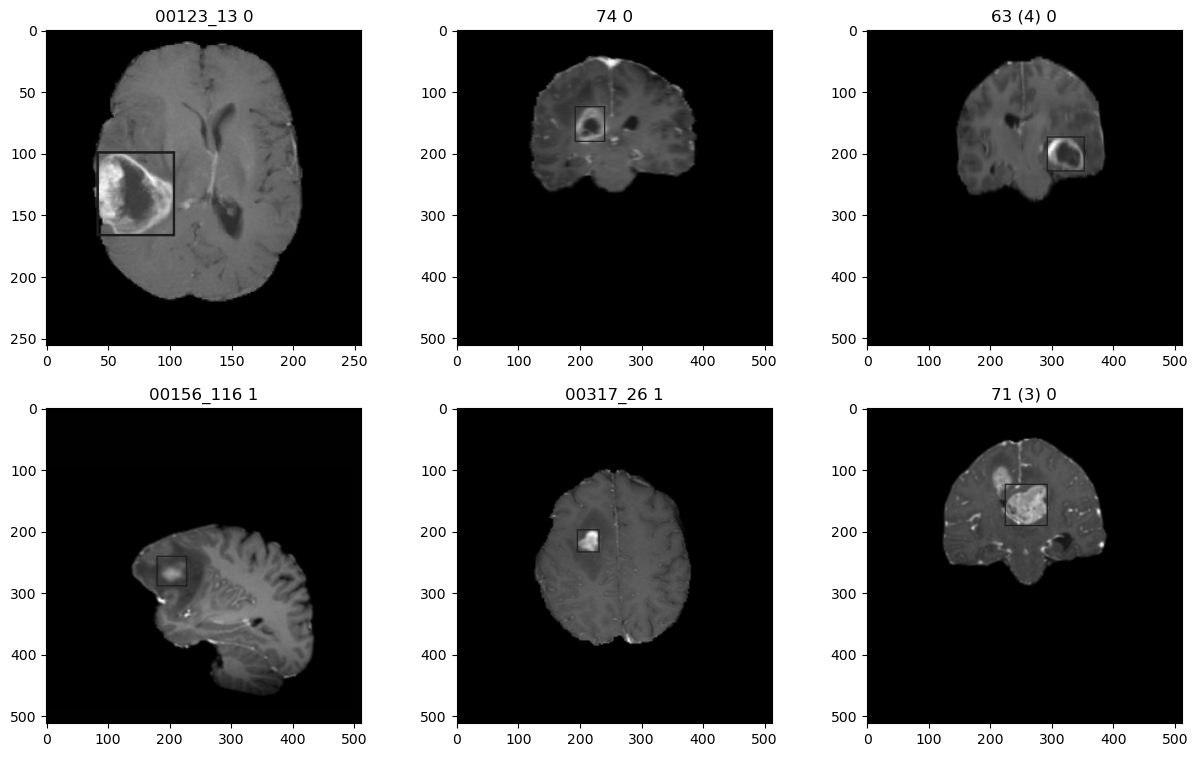

In [332]:
rndIds = np.random.choice(ids, nrows * ncols)
print(rndIds)
for i, id_ in enumerate(rndIds):
    img, label = load_img_label(train_labels_df, id_)
    print(img.size, label)
    plt.subplot(nrows, ncols, i + 1)
    show_img_label(img, label, thickness=2)
    plt.title(f"{train_labels_df['ID'][id_]} {train_labels_df['class'][id_]}")

In [333]:
# now gathering image widths and heights in two lists
h_list, w_list = [], []

planedict = {
    "axial": axialdata,
    "coronal": coronaldata,
    "sagittal": sagittaldata,
}

h_list = [
    Image.open(
        os.path.join(
            planedict[train_labels_df["plane"].loc[id_]],
            r"images/train",
            train_labels_df["ID"][id_] + ".jpg",
        )
    ).size[0]
    for id_ in ids
]
w_list = [
    Image.open(
        os.path.join(
            planedict[train_labels_df["plane"].loc[id_]],
            r"images/train",
            train_labels_df["ID"][id_] + ".jpg",
        )
    ).size[1]
    for id_ in ids
]

C:\Users\ologa\AppData\Local\Temp\ipykernel_37752\15300345.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=h_list, kde=False)


<Axes: >

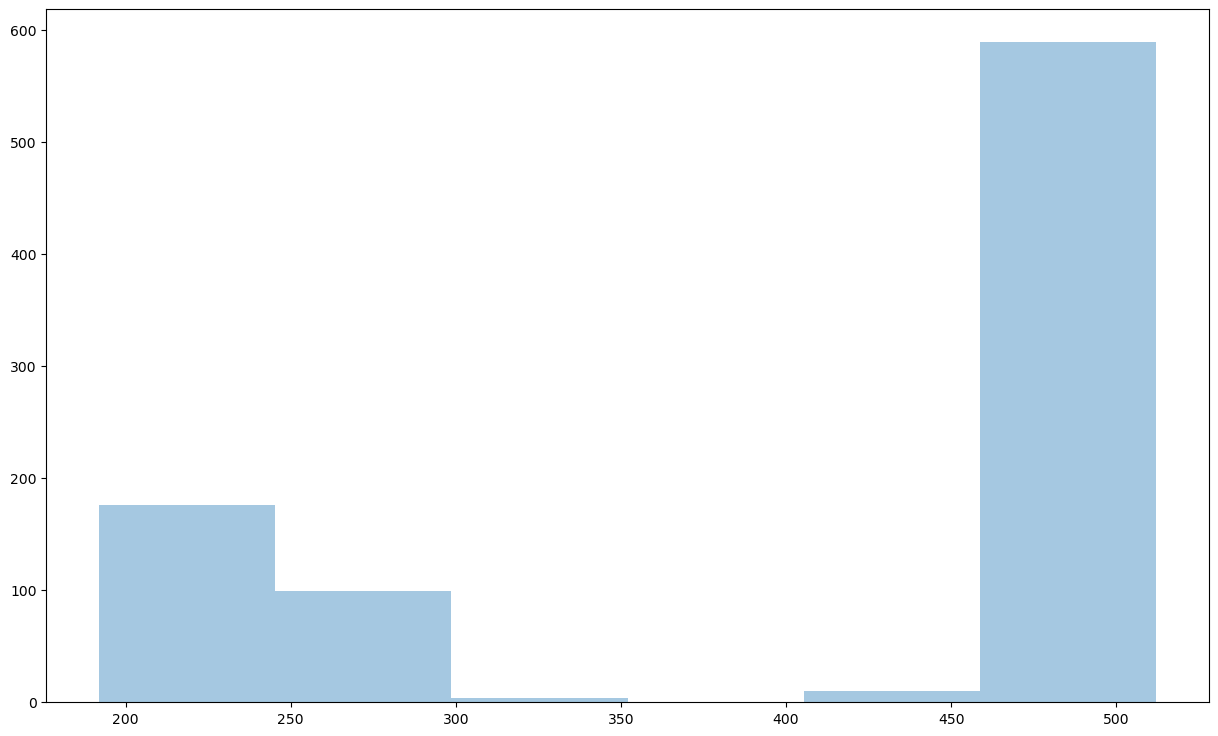

In [334]:
sns.distplot(a=h_list, kde=False)

C:\Users\ologa\AppData\Local\Temp\ipykernel_37752\2211962285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=w_list, kde=False)


<Axes: >

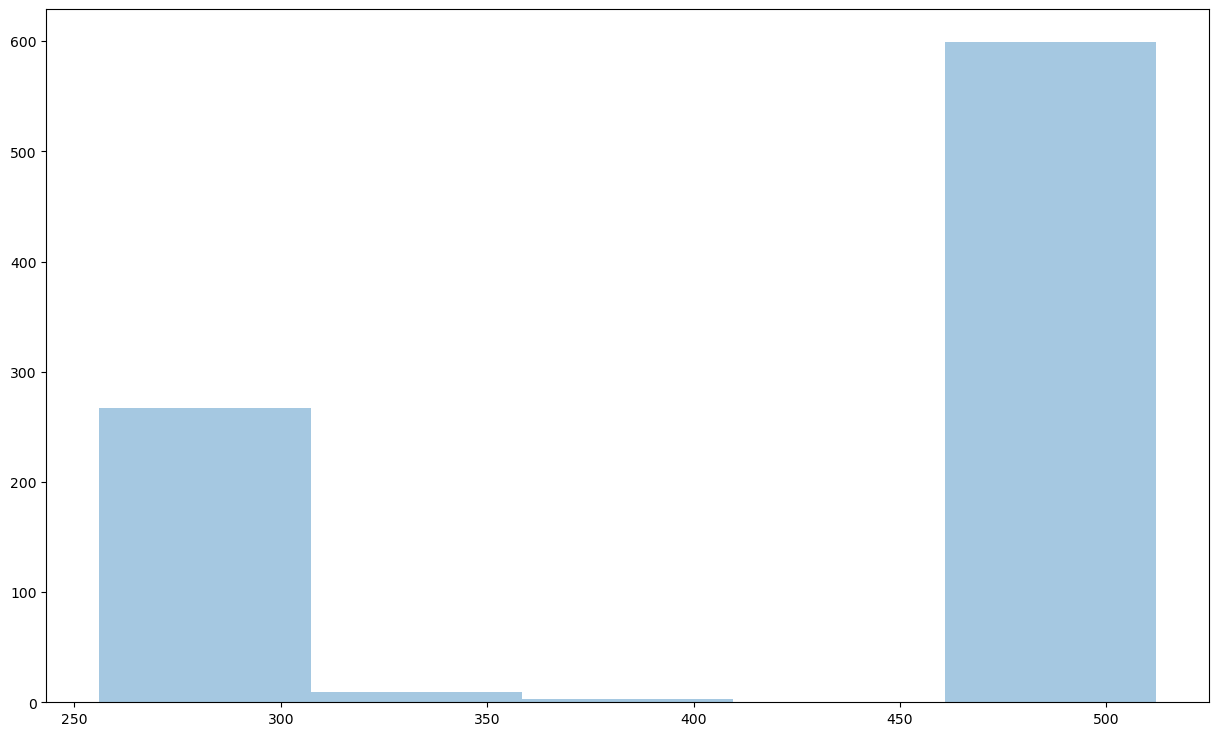

In [335]:
sns.distplot(a=w_list, kde=False)

In [336]:
print(min(w_list), min(h_list))
# minimum of the width is 256 and minimum of the height is 192
# so we resize the images to 256*192

256 192


In [337]:
# developing a pipeline for transforming the images
# helper function to resize the miages
import torchvision.transforms.functional as TF


def resize_img_label(image, label=(0.0, 0.0, 0.0, 0.0, None), target_size=(192, 192)):
    w_orig, h_orig = image.size
    w_target, h_target = target_size
    #     cx, width = train_labels_df[["x_cent", "width"]].values.T
    #     cy, height = train_labels_df[["y_cent", "height"]].values.T
    # #     cx = cx[id]
    #     width = width[id]
    #     cy = cy[id]
    #     height = height[id]
    cx, cy, width, height, p = label
    image_new = TF.resize(image, target_size)
    new_label = [
        (cx / w_orig) * w_target,
        (cy / h_orig) * h_target,
        (width / w_orig) * w_target,
        (height / h_orig) * h_target,
        p,
    ]
    return image_new, new_label


# here the target size is not square to see what will happen with the model
# def resize_img_label(image, label=(0.,0.), target_size=(256,192)):
#     w_orig, h_orig = image.size
#     w_target, h_target = target_size
#     cx, width = train_labels_df.loc[:,["x_cent", "width"]] * w_orig
#     cy, height = train_labels_df.loc[:,["y_cent", "height"]] * h_orig
#     image_new = TF.resize(image,target_size)
#     new_label = [cx/w_orig*w_target,cy/h_orig*h_target,
#                  width/w_orig*w_target,height/h_orig*h_target]
#     return image_new, new_label

In [338]:
# # try resizing with the written function
img, label = load_img_label(train_labels_df, 1)
print(img.size, label)

img_r, label_r = resize_img_label(img, label)
print(img_r.size, label_r)

(512, 512) (226.8544, 191.398912, 72.713728, 99.154944, 'axial')
(192, 192) [85.0704, 71.774592, 27.267648, 37.183104, 'axial']


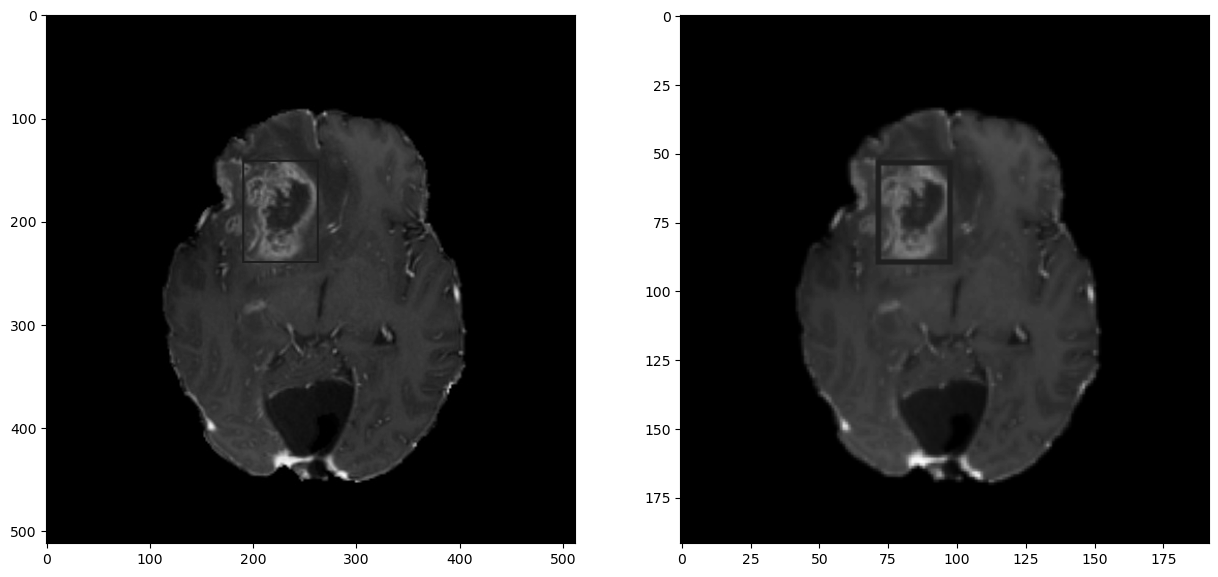

In [339]:
# let's plot
plt.subplot(1, 2, 1)
show_img_label(img, label)
plt.subplot(1, 2, 2)
show_img_label(img_r, label_r)

In [340]:
# helper function to flip the image horizontally
def random_hflip(image, label):
    w, h = image.size
    x, y, cw, ch, p = label
    image = TF.hflip(image)
    label = w - x, y, cw, ch, p
    return image, label

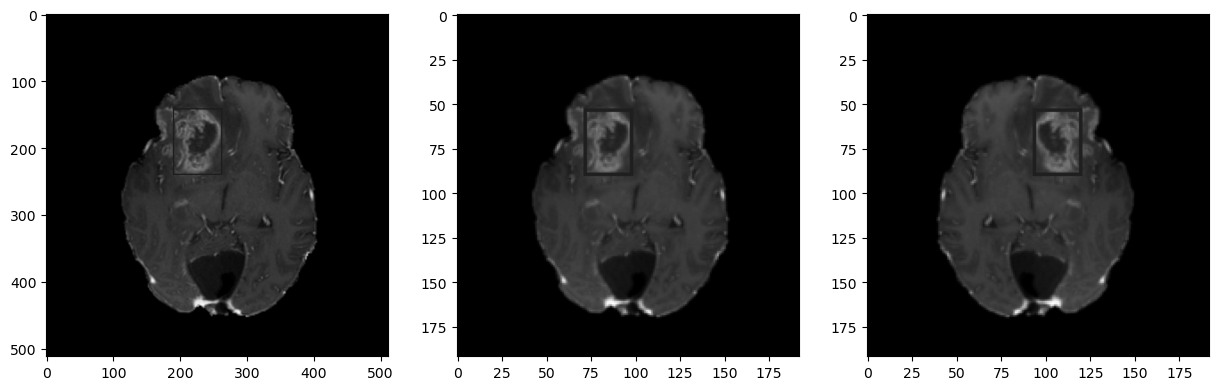

In [341]:
# to try the function
img, label = load_img_label(train_labels_df, 1)
img_r, label_r = resize_img_label(img, label)
img_fh, label_fh = random_hflip(img_r, label_r)

plt.subplot(1, 3, 1)
show_img_label(img, label)
plt.subplot(1, 3, 2)
show_img_label(img_r, label_r)
plt.subplot(1, 3, 3)
show_img_label(img_fh, label_fh)

In [342]:
# now vertical flip
def random_vflip(image, label):
    w, h = image.size
    x, y, cw, ch, p = label
    image = TF.vflip(image)
    label = x, h - y, cw, ch, p
    return image, label

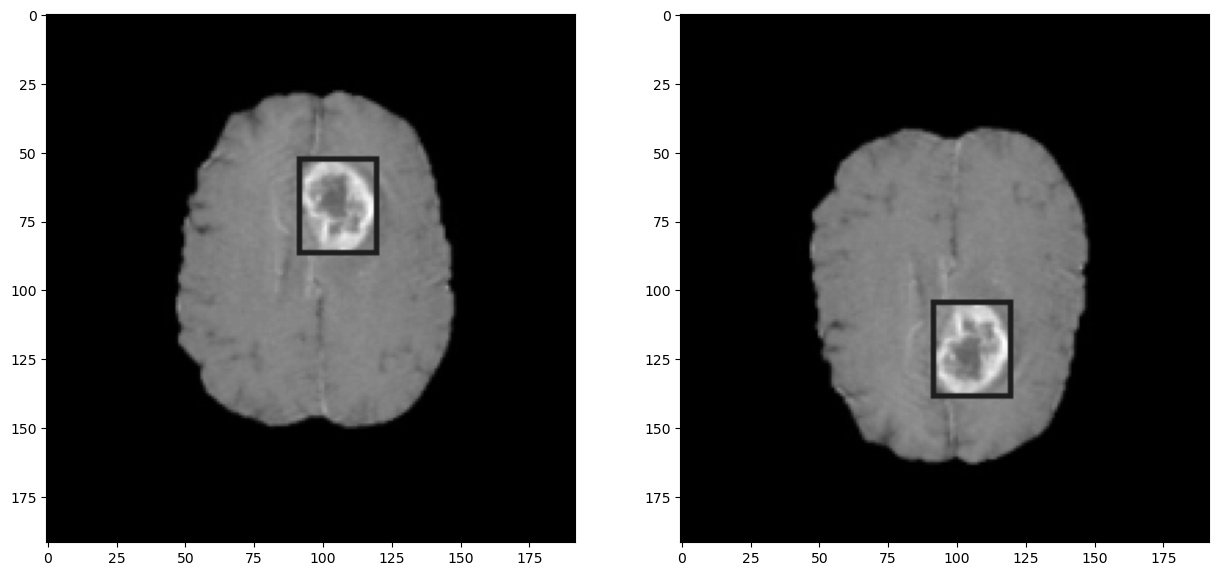

In [343]:
# example
img, label = load_img_label(train_labels_df, 27)
img_r, label_r = resize_img_label(img, label)
img_fv, label_fv = random_vflip(img_r, label_r)
# let's plot
plt.subplot(1, 2, 1)
show_img_label(img_r, label_r)
plt.subplot(1, 2, 2)
show_img_label(img_fv, label_fv)

In [344]:
# now helper to randomly shift the image or change its direction
import numpy as np

np.random.seed(1)


def random_shift(image, label, max_translate=(0.25, 0.25)):
    w, h = image.size
    max_t_w, max_t_h = max_translate
    cx, cy, cw, ch, p = label
    trans_coef = np.random.rand() * 2 - 1
    w_t = int(trans_coef * max_t_w * w)
    h_t = int(trans_coef * max_t_h * h)
    image = TF.affine(image, translate=(w_t, h_t), shear=0, angle=0, scale=1)
    label = cx + w_t, cy + h_t, cw, ch, p
    return image, label

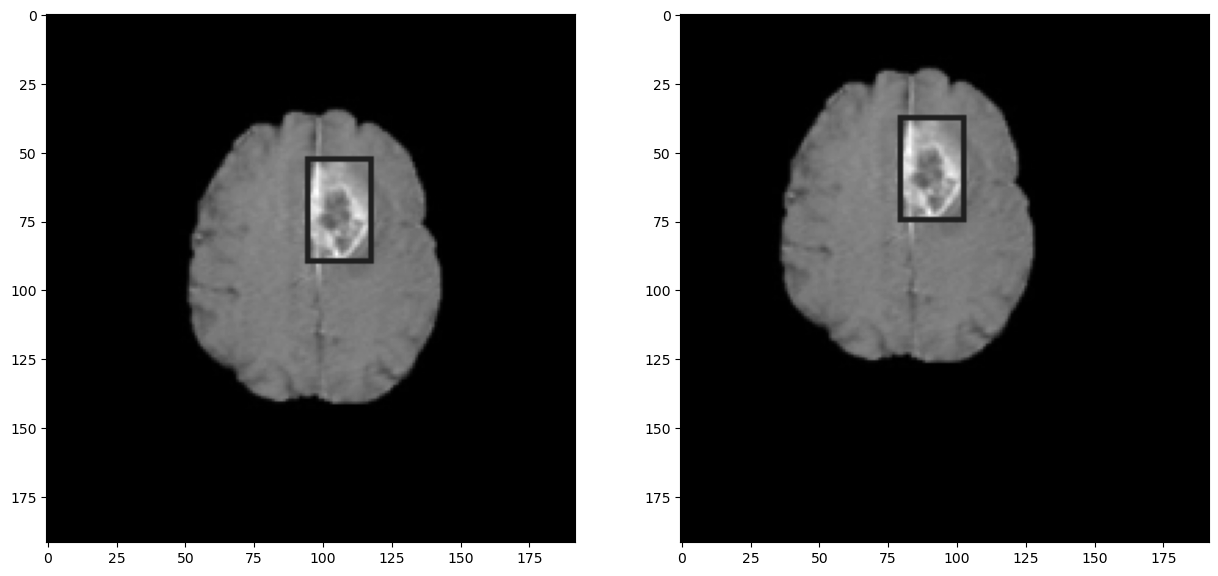

In [345]:
# let's see what happens
img, label = load_img_label(train_labels_df, 29)
img_r, label_r = resize_img_label(img, label)
img_t, label_t = random_shift(img_r, label_r, max_translate=(0.5, 0.5))
# max_translate means that the maximum translation of the image width and height
# will be max_translate[0] * width and max_translate[1] * height
# --> usually [.1,.2] is safe for max_translate to the location of interest
# not to be out of the boundaries
# what will occur
plt.subplot(1, 2, 1)
show_img_label(img_r, label_r)
plt.subplot(1, 2, 2)
show_img_label(img_t, label_t)

In [346]:
# now define our transformer using the previously defined functions
# def transformer(image, label, params):
#     image, label = resize_img_label(image, label, params["target_size"])
#     if np.random.rand() < params["p_hflip"]:
#         image, label = random_hflip(image, label)
#     if np.random.rand() < params["p_vflip"]:
#         image, label = random_vflip(image, label)
#     if np.random.rand() < params["p_shift"]:
#         image, label = random_shift(image, label, params["max_translate"])
#     image = TF.to_tensor(image)
#     return image, label
# maybe we could remove to_tensor here and define it through our model
# also this steps could be done with the help of the openCV package

In [347]:
# test the function
# np.random.seed(123)
# img, label = load_img_label(train_labels_df, 39)
# params = {
#     "target_size" : (192, 192),
#     "p_hflip": 1.0,
#     "p_vflip": 1.0,
#     "p_shift": 1.0,
#     "max_translate": (0.2, 0.2),
# }
# img_tsf, label_tsf = transformer(img, label, params)
# # show
# plt.subplot(1, 2, 1)
# show_img_label(img, label)
# plt.subplot(1, 2, 2)
# show_img_label(TF.to_pil_image(img_tsf), label_tsf)

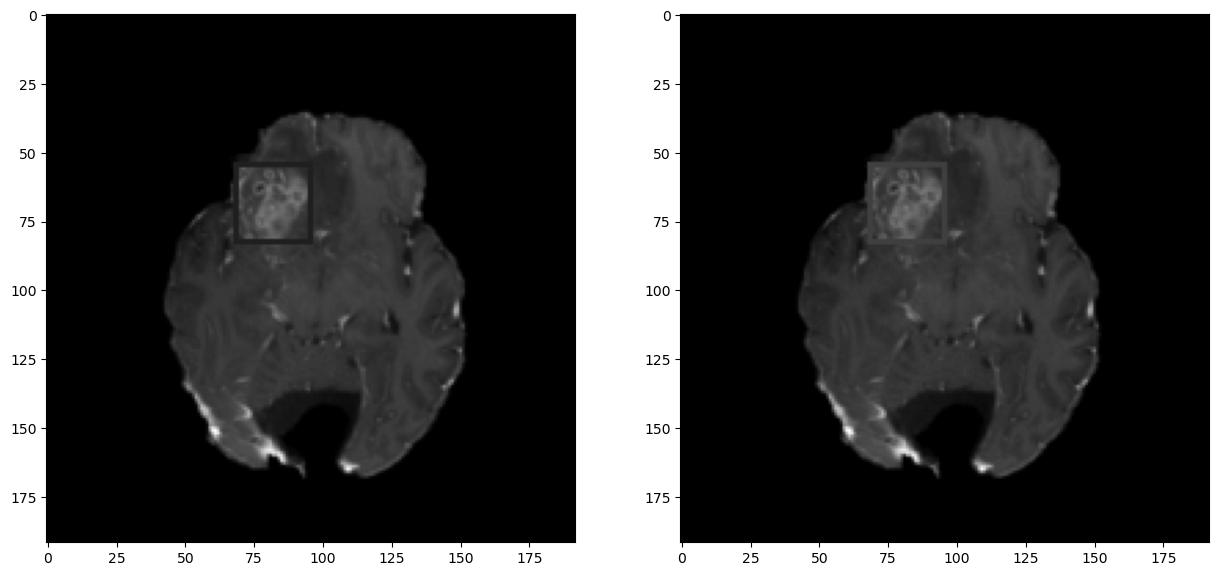

In [348]:
# more transformation
img, label = load_img_label(train_labels_df, 0)

# resize
img_r, label_r = resize_img_label(img, label)

# brightness adjust
img_t = TF.adjust_brightness(img_r, brightness_factor=0.5)
label_b = label_r

# contrast
# img_t = TF.adjust_contrast(img_r, contrast_factor=0.4)

# gamma correction
# img_t = TF.adjust_gamma(img_r, gamma=1.4)


plt.subplot(1, 2, 1)
show_img_label(img_r, label_r)
plt.subplot(1, 2, 2)
show_img_label(img_t, label_b)

In [349]:
# contrast
img_c = TF.adjust_contrast(img_r, contrast_factor=0.4)

# gamma correction
img_g = TF.adjust_gamma(img_r, gamma=1.4)

In [350]:
# returning the label to [0, 1]
# specefically for object detection this transformation is vital for model convergence
def scale_label(a, b):
    # print(a)
    scale = [ai / bi for ai, bi in zip(a[:-1], b + b)]
    scale = scale + [a[-1]]
    return scale

In [351]:
scale_label((136.77472, 136.2112, 13.0704, 13.295808000000001, "axial"), (192, 192))

[0.7123683333333334, 0.7094333333333332, 0.068075, 0.069249, 'axial']

In [352]:
# updating the transformer function
def transformer(image, label, params):
    image, label = resize_img_label(image, label, params["target_size"])
    if np.random.rand() < params["p_hflip"]:
        image, label = random_hflip(image, label)
        # print(label, "hflip")
    if np.random.rand() < params["p_vflip"]:
        image, label = random_vflip(image, label)
        # print(label, "vflip")
    if np.random.rand() < params["p_shift"]:
        image, label = random_shift(image, label, params["max_translate"])
        # print(label, "shift")
    if np.random.rand() < params["p_brightness"]:
        brightness_factor = 1 + (np.random.rand() * 2 - 1) * params["brightness_factor"]
        image = TF.adjust_brightness(image, brightness_factor)
        # print(label, "bright")
    if np.random.rand() < params["p_contrast"]:
        contrast_factor = 1 + (np.random.rand() * 2 - 1) * params["contrast_factor"]
        image = TF.adjust_contrast(image, contrast_factor)
        # print(label, "contrast")
    if np.random.rand() < params["p_gamma"]:
        gamma_factor = 1 + (np.random.rand() * 2 - 1) * params["gamma_factor"]
        image = TF.adjust_gamma(image, gamma_factor)
        # print(label, "gamma")
    if params["scale_label"]:
        label = scale_label(label, params["target_size"])
        # print(label, "scale_label")
    image = TF.to_tensor(image)
    return image, label

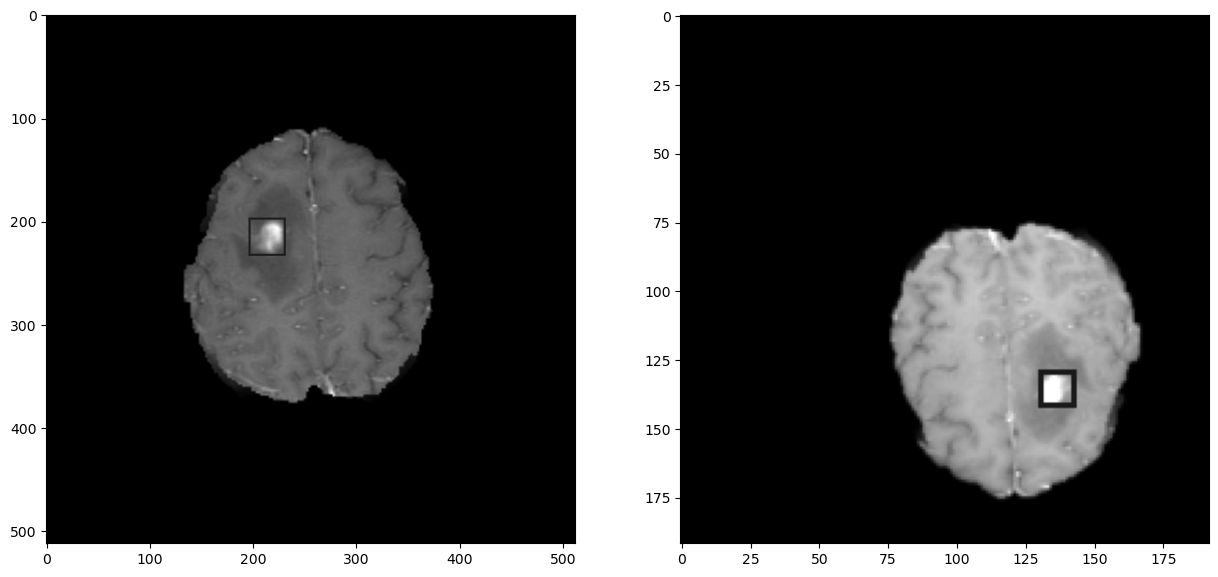

In [353]:
# check the above function
np.random.seed(34)
img, label = load_img_label(train_labels_df, 240)
params = {
    "target_size": (192, 192),
    "p_hflip": 1.0,
    "p_vflip": 1.0,
    "p_shift": 1.0,
    "max_translate": (0.5, 0.5),
    "p_brightness": 1.0,
    "brightness_factor": 0.8,
    "p_contrast": 1.0,
    "contrast_factor": 0.8,
    "p_gamma": 1.0,
    "gamma_factor": 0.4,
    "scale_label": True,
}
z = transformer
img_t, label_t = z(img, label, params)

# let's fall into drawing
plt.subplot(1, 2, 1)
show_img_label(img, label)
plt.subplot(1, 2, 2)
show_img_label(TF.to_pil_image(img_t), label_t)

In [354]:
# Augmentor, imagaug, and albumentations could be used for transformation

In [355]:
# Time to create the dataset
from torch.utils.data import Dataset
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [356]:
# in this class I give the direcotry to the scaled weight from [0, 1]
class MRI_dst(Dataset):
    def __init__(self, transform, trans_params, train=True):
        self.sit = "train" if train else "test"
        path2label = self.sit + "_labels_noscale.csv"
        labels = pd.read_csv(path2label, index_col="ID")
        classes = {"axial": 0, "coronal": 1, "sagittal": 2}
        labels["plane"] = labels["plane"].map(classes)
        labels.columns.values[0] = "idx"
        self.labels = labels[["x_cent", "y_cent", "width", "height", "plane"]].values
        self.ids = labels.index
        self.imgname = self.ids + ".jpg"
        self.plane = labels["plane"]
        self.path2img = labels[
            "path2img"
        ]  # path2data + "/images/" + self.sit + "/" + self.imgname
        self.transform = transform
        self.trans_params = trans_params

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = Image.open(self.path2img[idx])
        label = self.labels[idx]
        image, label = self.transform(image, label, self.trans_params)
        return image, label

In [357]:
trans_params_train = {
    "target_size": (192, 192),
    "p_hflip": 1.0,
    "p_vflip": 1.0,
    "p_shift": 1.0,
    "max_translate": (0.2, 0.2),
    "p_brightness": 1.0,
    "brightness_factor": 0.2,
    "p_contrast": 1.0,
    "contrast_factor": 0.2,
    "p_gamma": 1.0,
    "gamma_factor": 0.2,
    "scale_label": True,
}

In [358]:
trans_params_val = {
    "target_size": (192, 192),
    "p_hflip": 0.0,
    "p_vflip": 0.0,
    "p_shift": 0.0,
    "max_translate": (0.2, 0.2),
    "p_brightness": 0.0,
    "brightness_factor": 0.0,
    "p_contrast": 0.0,
    "contrast_factor": 0.0,
    "p_gamma": 0.0,
    "gamma_factor": 0.0,
    "scale_label": False,
}

In [359]:
mri_ds1 = MRI_dst(transformer, trans_params_train)
mri_ds2 = MRI_dst(transformer, trans_params_val)

C:\Users\ologa\AppData\Local\Temp\ipykernel_37752\317970512.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = Image.open(self.path2img[idx])


[0.3045776666666667, 0.4923706666666667, 0.12363099999999999, 0.089202, 0.0]


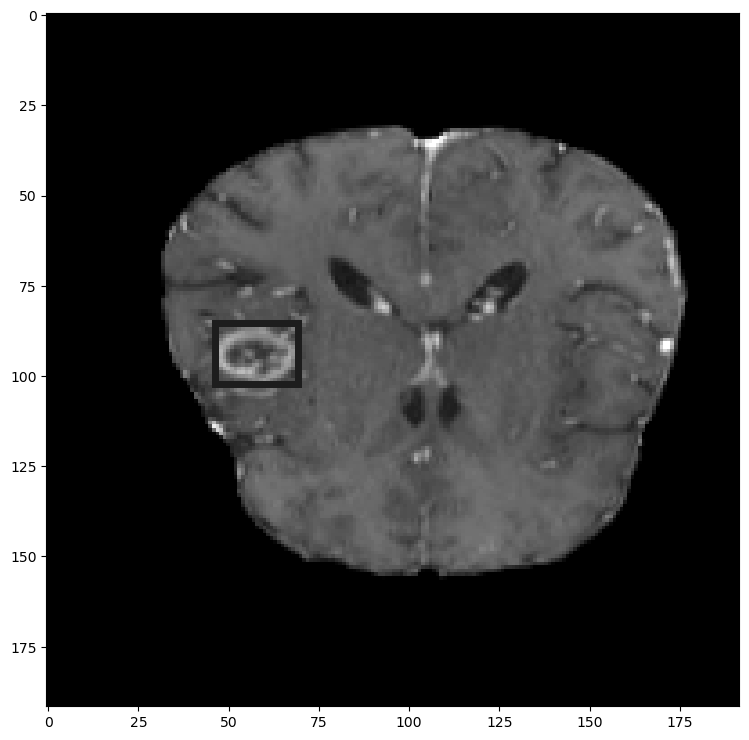

In [360]:
a, b = mri_ds1[222]
print(b)
show_img_label(TF.to_pil_image(a), b)

C:\Users\ologa\AppData\Local\Temp\ipykernel_37752\317970512.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = Image.open(self.path2img[idx])


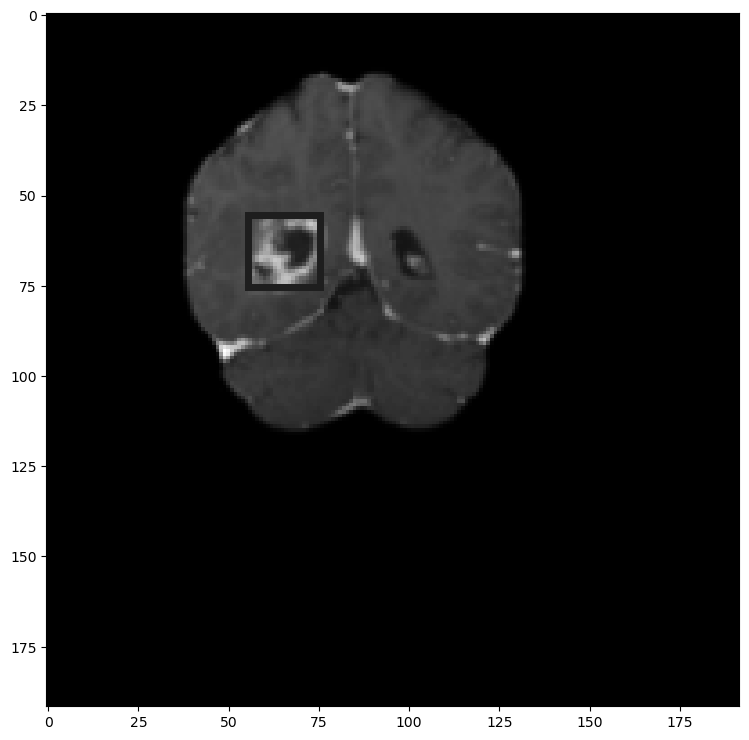

In [361]:
c, d = mri_ds2[550]
show_img_label(TF.to_pil_image(c), d)

In [362]:
# although we have seperate test dataset but anyay I want to try it!
from sklearn.model_selection import train_test_split

train_ds, val_ds = train_test_split(
    mri_ds1, test_size=0.05, random_state=25, shuffle=True
)  # , stratify=['plane'])
print(len(train_ds), len(val_ds))
# also there is another ready datafile which belongs to the test group

C:\Users\ologa\AppData\Local\Temp\ipykernel_37752\317970512.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = Image.open(self.path2img[idx])


834 44


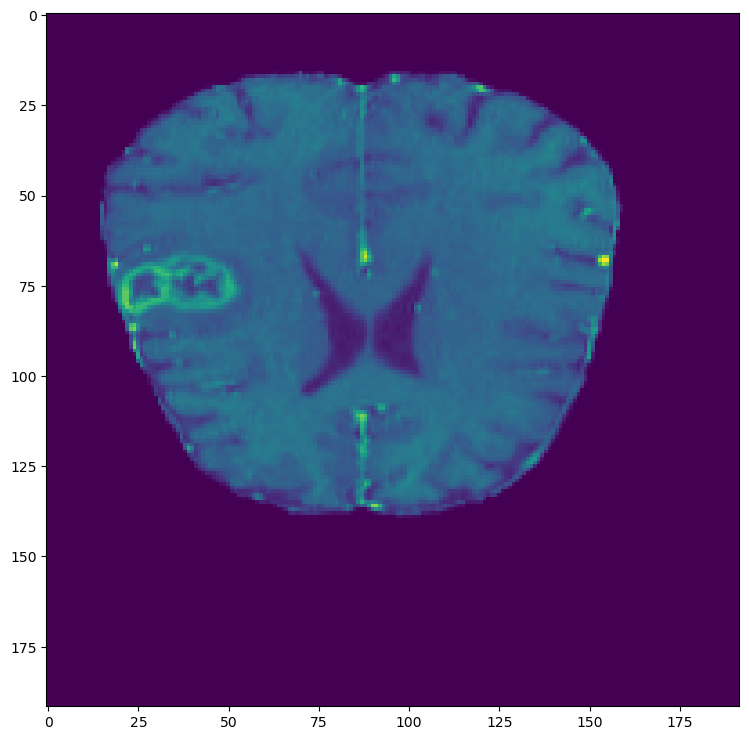

In [363]:
plt.imshow(val_ds[2][0].permute(1, 2, 0))
# a, b = val_ds[172]
# show_img_label(TF.to_pil_image(a), b)

In [364]:
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision.utils import make_grid, draw_bounding_boxes

In [365]:
(192, 192) * 2

(192, 192, 192, 192)

In [366]:
# function to rescale labels
def rescale_label(a, b):
    x = int(len(a) / 2) if len(a) >= 2 else int(2)
    div = [ai * bi for ai, bi in zip(a, b * x)]
    return div

In [367]:
# images_sample[1][0,...].shape

In [368]:
# randomly choosing the images and making the grid
rnds = np.random.rand(2, 3)
(rnds[0], rnds[1]) = (
    np.floor((rnds[0] * len(train_ds))),
    (np.floor(rnds[1] * len(val_ds))),
)

print(rnds[0], rnds[1])

images_sample = [train_ds[int(i)][0] for i in rnds[0]] + [
    val_ds[int(i)][0] for i in rnds[1]
]
labels_sample = [
    rescale_label(train_ds[int(i)][1], train_ds[int(i)][0][0, ...].shape)
    for i in rnds[0]
] + [rescale_label(val_ds[int(i)][1], val_ds[int(i)][0][0, ...].shape) for i in rnds[1]]

img_box = [
    draw_bounding_boxes(
        (img * 255).to(torch.uint8),
        torchvision.ops.box_convert(
            torch.Tensor(box[:-1]).reshape((1, 4)), in_fmt="cxcywh", out_fmt="xyxy"
        ),
    )
    for img, box in zip(images_sample, labels_sample)
]
grid = make_grid(img_box, nrow=3, padding=20, border=5)
grid = grid.permute(1, 2, 0).numpy()
grid_labels = zip(["train"] * 3 + ["val"] * 3, list(range(1, 4)) * 2)
grid_labels = [x + str(y) for x, y in grid_labels]

[375. 193. 491.] [15. 19.  9.]


RuntimeError: shape '[1, 4]' is invalid for input of size 3

In [ ]:
plt.imshow(grid)
for i, label in enumerate(grid_labels):
    x = i % 3
    y = i // 3
    plt.text(
        x * (grid.shape[1] // 3) + 20,
        y * (grid.shape[0] // 2) + 20,
        label,
        color="blue",
        fontsize=12,
    )

NameError: name 'grid' is not defined

In [369]:
# now it's time to build dataloader
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)

In [370]:
for img_b, label_b in train_ds:
    print(img_b.shape, img_b.dtype)
    print(label_b)
    break

torch.Size([1, 192, 192]) torch.float32
[0.5115906666666666, 0.4482096666666666, 0.109155, 0.139671, 1.0]


In [371]:
# get a batch of train_dl
for img_b, label_b in train_dl:
    print(img_b.shape, img_b.dtype)
    print(label_b)
    break

torch.Size([16, 1, 192, 192]) torch.float32
[tensor([0.5783, 0.6302, 0.6147, 0.4679, 0.5604, 0.3451, 0.1685, 0.7211, 0.2395,
        0.4740, 0.5978, 0.3264, 0.1485, 0.3333, 0.7377, 0.5154],
       dtype=torch.float64), tensor([0.5319, 0.2547, 0.6780, 0.4914, 0.7582, 0.6502, 0.6403, 0.7123, 0.3968,
        0.5121, 0.5948, 0.6081, 0.4385, 0.5739, 0.9255, 0.5518],
       dtype=torch.float64), tensor([0.1479, 0.1422, 0.0599, 0.1338, 0.0880, 0.1162, 0.1150, 0.0869, 0.2144,
        0.1538, 0.0681, 0.1221, 0.0798, 0.1232, 0.0528, 0.1068],
       dtype=torch.float64), tensor([0.1232, 0.1538, 0.0716, 0.1502, 0.0939, 0.1326, 0.0962, 0.0763, 0.1761,
        0.1526, 0.0692, 0.1455, 0.0798, 0.0857, 0.0575, 0.1303],
       dtype=torch.float64), tensor([1., 0., 1., 0., 2., 1., 1., 0., 0., 2., 0., 1., 2., 2., 2., 1.],
       dtype=torch.float64)]


In [372]:
# to convert label batch from list to tensor to see the shape of labels
import torch

for img_b, label_b in train_dl:
    print(img_b.shape, img_b.dtype)
    # print(label_b[:-1])
    label_b = torch.stack(label_b[:-1], 1)
    label_b = label_b.type(torch.float32)
    print(label_b.shape, label_b.dtype)
    break
# doing the same for val_dl
for img_b, label_b in val_dl:
    print(img_b.shape, img_b.dtype)
    label_b = torch.stack(label_b[:-1], 1)
    label_b = label_b.type(torch.float32)
    print(label_b.shape, label_b.dtype)
    break

torch.Size([16, 1, 192, 192]) torch.float32
torch.Size([16, 4]) torch.float32
torch.Size([16, 1, 192, 192]) torch.float32
torch.Size([16, 4]) torch.float32


In [373]:
# Let's take a plung into model
import torch.nn as nn
import torch.nn.functional as F

In [374]:
# Get Device for Training
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [375]:
# class Block(nn.Module):
#     def __init__(self, params, kernel=3, padding=1):
#         super().__init__()
#         C_in, H_in, W_in = params["input_shape"]
#         init_f = params["initial_filters"]
#         num_outputs = params["num_outputs"]
#         self.flatten = nn.Flatten()
#         # layers
#         self.conv = nn.Conv2d(C_in, init_f, kernel=kernel, stride=2, padding=padding)
#         self.bn = nn.BatchNorm2d(init_f)
#     def forward(self, x):
#         out = self.conv(x)
#         out = self.bn(out)
#         out = F.leaky_relu(out, negative_slope=0.1)
#         return out
#         The relu could be directly
#         self.relu1 = nn.ReLU(inplace=True)
#         self.bn1 = nn.BatchNorm2d(init_f)
#         self.conv2 = nn.Conv2d(init_f + C_in, 2*init_f, kernel, stride=1, padding)
#         self.bn2 = nn.BatchNorm2d(2*init_f)
#         self.relu2 = nn.ReLU(inplace=True)
#         self.conv3 = nn.Conv2d(3*init_f + C_in, 4*init_f, kernel, padding)
#         self.bn3 = nn.BatchNorm2d(4*init_f)
#         self.relu3 = nn.ReLU(inplace=True)
#         self.cnov4 = nn.Conv2d(7*init_f + C_in, 8*init_f, kernel, padding)
#         self.bn4 = nn.BatchNorm2d(8*init_f)
#         self.relu4 = nn.ReLU(inplace=True)
#         self.conv5 = nn.Conv2d(15*init_f + C_in, 16*init_f, kernel, padding)
#         self.bn5 = nn.BatchNorm2d(16*init_f)
#         self.relu5 = nn.ReLU(inplace=True)
#     def forward(self, x):
#         identity = x

In [376]:
# class Net(nn.Module):
#     def __init__(self, params):
#         super().__init__()
#         C_in, H_in, W_in = params["input_shape"]
#         init_f = params["initial_filters"]
#         num_outputs = params["num_outputs"]
#         self.params = params
#         self.flatten = nn.Flatten()
#         self.block1 = Block(self.params)
#         self.params["input_shape"] =
#         self.block2 = Block(self.params)
#         self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3, stride=2, padding=1)
#         # the input of each layer will be the output of previous layer along with an skip
#         # connection from the input layer of the previous layer
# #         self.conv2 = nn.Conv2d(init_f + C_in, 2*init_f, kernel_size=3, stride=1, padding=1)
# #         self.conv3 = nn.Conv2d(3*init_f + C_in, 4*init_f, kernel_size=3, padding=1)
# #         self.cnov4 = nn.Conv2d(7*init_f + C_in, 8*init_f, kernel_size=3, padding=1)
# #         self.conv5 = nn.Conv2d(15*init_f + C_in, 16*init_f, kernel_size=3, padding=1)
#         self.fc1 = nn.Linear(16*init_f)
#     def forward(self, x):
#         return x

In [378]:
class Net(nn.Module):
    def __init__(self, params):
        super().__init__()
        C_in, H_in, W_in = params["input_shape"]
        init_f = params["initial_filters"]
        num_outputs = params["num_outputs"]
        self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3, stride=2, padding=1)
        #         self.bn1 = nn.BatchNorm2d(init_f)
        #         the input of each layer will be the output of previous layer along with an skip
        #         connection from the input layer of the previous layer
        self.conv2 = nn.Conv2d(
            init_f + C_in, 2 * init_f, kernel_size=3, stride=1, padding=1
        )
        #         self.bn2 = nn.BatchNorm2d(2*init_f)
        self.conv3 = nn.Conv2d(3 * init_f + C_in, 4 * init_f, kernel_size=3, padding=1)
        #         self.bn3 = nn.BatchNorm2d(4*init_f)
        self.conv4 = nn.Conv2d(7 * init_f + C_in, 8 * init_f, kernel_size=3, padding=1)
        #         self.bn4 = nn.BatchNorm2d(8*init_f)
        self.conv5 = nn.Conv2d(
            15 * init_f + C_in, 16 * init_f, kernel_size=3, padding=1
        )
        self.dropout = nn.Dropout(p=0.15)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, num_outputs)
        self.fc6 = nn.Linear(16, 3)

    def forward(self, x):
        # the following applies avg_pool2d with a kernel of (4, 4) and stride of (4, 4)
        identity = F.avg_pool2d(x, 4, 4)
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        identity = F.avg_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        identity = F.avg_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        identity = F.avg_pool2d(x, 2, 2)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        x = F.relu(self.conv5(x))
        x = F.adaptive_avg_pool2d(x, 1)
        #         x = x.reshape(x.size(0), -1)
        x = self.flatten(x)
        #         or torch.flatten() could be used

        # y = self.fc1(x)
        # z = self.fc2(x)
        # x = self.bn5(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        x = self.dropout(F.relu(self.fc4(x)))
        y = self.fc5(x)
        z = F.log_softmax(self.fc6(x), dim=1)
        # print(y)
        # print(z)
        # print(torch.concatenate((y, z), axis=1))
        return torch.concatenate((y, z), axis=1)  # y + z

In [379]:
params_model = {"input_shape": (1, 192, 192), "initial_filters": 16, "num_outputs": 4}

model = Net(params_model)
model = model.to(device)

In [380]:
print(model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(17, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(49, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(113, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(241, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout): Dropout(p=0.15, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (fc5): Linear(in_features=16, out_features=4, bias=True)
  (fc6): Linear(in_features=16, out_features=3, bias=True)
)


In [381]:
# optimizer, loss, and IOU
# first loss
loss_func1 = nn.SmoothL1Loss(reduction="sum")
loss_func2 = nn.CrossEntropyLoss()

In [382]:
# try loss
# n, c = 7, 5
y = 0.5 * torch.ones(5, 7, requires_grad=True)
# print(y)
print(y.shape)

target = torch.zeros(5, 5)
# print(target)
print(target.shape)

print(y[:, -3:].shape)
print(target[:, -1])

loss = loss_func1(y[:, :-3], target[:, :-1])
print(loss.item())

loss = loss_func2(y[:, -3:], target[:, -1].type(torch.LongTensor))
print(loss.item())

y = 2 * torch.ones(5, 7, requires_grad=True)
target = torch.zeros(5, 5, requires_grad=False)
loss = loss_func1(y[:, :-3], target[:, :-1])
print(loss.item())

loss = loss_func2(y[:, -3:], target[:, -1].type(torch.LongTensor))
print(loss.item())

torch.Size([5, 7])
torch.Size([5, 5])
torch.Size([5, 3])
tensor([0., 0., 0., 0., 0.])
2.5
1.0986123085021973
30.0
1.0986123085021973


In [383]:
# optimizer
from torch import optim

opt = optim.Adam(model.parameters(), lr=3e-4)

In [384]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group["lr"]


current_lr = get_lr(opt)
print(f"current lr = {current_lr}")

current lr = 0.0003


In [385]:
# defining lr_scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(opt, mode="min", factor=0.5, patience=20, verbose=1)

In [386]:
for i in range(100):
    lr_scheduler.step(1)

Epoch 00022: reducing learning rate of group 0 to 1.5000e-04.
Epoch 00043: reducing learning rate of group 0 to 7.5000e-05.
Epoch 00064: reducing learning rate of group 0 to 3.7500e-05.
Epoch 00085: reducing learning rate of group 0 to 1.8750e-05.


In [387]:
# IOU function for a batch of data
box = torch.rand(2, 4)
print(box)
print(box * 192)


def bbox(box):
    x = torchvision.ops.box_convert(
        torch.stack(rescale_label(box, (192, 192)), dim=0),
        in_fmt="cxcywh",
        out_fmt="xyxy",
    )
    return x


print(bbox(box))

tensor([[0.0733, 0.6480, 0.5603, 0.4826],
        [0.3784, 0.8412, 0.2455, 0.0766]])
tensor([[ 14.0795, 124.4224, 107.5814,  92.6561],
        [ 72.6470, 161.5197,  47.1420,  14.7164]])
tensor([[-39.7112,  78.0944,  67.8702, 170.7504],
        [ 49.0760, 154.1615,  96.2180, 168.8779]])


In [388]:
rescale_label(target, (192, 192))

[tensor([0., 0., 0., 0., 0.]),
 tensor([0., 0., 0., 0., 0.]),
 tensor([0., 0., 0., 0., 0.]),
 tensor([0., 0., 0., 0., 0.])]

In [422]:
# metric function
import torchvision


def metrics_batch(output, target):
    # print(len(output), len(target))
    output = bbox(output)
    target = bbox(target)
    iou = torchvision.ops.box_iou(output, target)
    # print(iou)
    return torch.diagonal(iou, 0).sum().item()

In [423]:
# let's test metric function
n, c = 5, 4
target1 = torch.rand(n, c, device=device)
target2 = torch.rand(n, c, device=device)
print(target1), print(target2)
# target2 = torch.rand(5, 5, device=device)
target1 = bbox(target1)
target2 = bbox(target2)
metrics_batch(target1, target2)

tensor([[0.8587, 0.6470, 0.2450, 0.7860],
        [0.8442, 0.3375, 0.4274, 0.1746],
        [0.8843, 0.2075, 0.1789, 0.7777],
        [0.9925, 0.9642, 0.7681, 0.4411],
        [0.6291, 0.9199, 0.6104, 0.3708]])
tensor([[0.4664, 0.6591, 0.1207, 0.7048],
        [0.9033, 0.5641, 0.0609, 0.6735],
        [0.4215, 0.0107, 0.5619, 0.6491],
        [0.9102, 0.0319, 0.6749, 0.2577],
        [0.4736, 0.7349, 0.4349, 0.4921]])


0.7724459171295166

In [424]:
# loss_batch
def loss_batch(loss_func, output, target, opt=None):
    loss_a = loss_func[0](output[:, :-3], target[:, :-1])
    loss_b = loss_func[1](output[:, -3:], target[:, -1].type(torch.LongTensor))

    loss = loss_a + (loss_b * 0.5)

    # loss = loss_func(output, target)
    with torch.no_grad():
        metric_b = metrics_batch(output[:, :-3], target[:, :-1])
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b

In [425]:
def loss_batch2(loss_func, output, target, opt=None):
    # loss_a = loss_func[0](output[:, :-3], target[:, :-1])
    loss = loss_func(output, target[:, -1].type(torch.LongTensor))

    # loss = loss_a + loss_b

    # loss = loss_func(output, target)
    # with torch.no_grad():
    #     metric_b = metrics_batch(output[:, :-3], target[:, :-1])
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item()

In [426]:
zeros = np.zeros((4, 3))
print(zeros)
np.concatenate((target, zeros), axis=1)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([[-41.25108719, -87.30444336,  93.93531799,  89.92471313,
          0.        ,   0.        ,   0.        ],
       [ 22.08312225,  93.60536957, 199.6288147 , 182.2366333 ,
          0.        ,   0.        ,   0.        ],
       [ 29.00262833,  38.14520645, 107.10656738,  63.48652267,
          0.        ,   0.        ,   0.        ],
       [ 90.68169403,  89.44483948, 135.25300598, 136.94194031,
          0.        ,   0.        ,   0.        ]])

In [427]:
# test loss_batch
for xb, label_b in train_dl:
    label_b = torch.stack(label_b, 1)
    label_b = label_b.type(torch.float32)
    # print(label_b.shape)
    label_b = label_b.to(device)
    zeros = torch.zeros((16, 2))
    # print(zeros)
    label_a = torch.concatenate((label_b, zeros), axis=1)
    # print(label_a)
    l, m = loss_batch([loss_func1, loss_func2], label_a, label_b)
    print(l, m)
    break
# this should return 0.0 8.0

0.7983318567276001 16.0


In [428]:
# train and evaluate the model
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)
    # internal loop
    for xb, yb in dataset_dl:
        yb = torch.stack(yb, 1)
        yb = yb.type(torch.float32).to(device)
        output = model(xb.to(device))
        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)
        running_loss += loss_b
        if metric_b is not None:
            running_metric += metric_b
        if sanity_check is True:
            break
    loss = running_loss / float(len_data)
    metric = running_metric / float(len_data)
    return loss, metric

In [429]:
# train_val function
import copy


def train_val(model, params):
    num_epochs = params["num_epochs"]
    loss_func = params["loss_func"]
    opt = params["optimizer"]
    train_dl = params["train_dl"]
    val_dl = params["val_dl"]
    sanity_check = params["sanity_check"]
    lr_scheduler = params["lr_scheduler"]
    path2weights = params["path2weights"]
    # keep track of loss and metric values
    loss_history = {"train": [], "val": []}
    metric_history = {"train": [], "val": []}
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float("inf")
    # epochs
    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print(f"Epoch {epoch}/{num_epochs - 1}, current lr = {current_lr}")
        model.train()
        train_loss, train_metric = loss_epoch(
            model, loss_func, train_dl, sanity_check, opt
        )
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
            loss_history["val"].append(val_loss)
            metric_history["val"].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print("The best model updated!")

        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts)

        print(f"train loss: {train_loss: .6f}, accuracy: {100*train_metric: .2f}")
        print(f"val loss: {val_loss: .6f}, accuracy: {100*val_metric: .2f}")
        print("-" * 10)

    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history

In [442]:
# training the model
loss_func1 = nn.SmoothL1Loss(reduction="sum")
loss_func2 = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=1e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode="min", factor=0.5, patience=20, verbose=1)

path2models = "models/"
if not os.path.exists(path2models):
    os.mkdir(path2models)

params_train = {
    "num_epochs": 150,
    "optimizer": opt,
    "loss_func": [loss_func1, loss_func2],
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models + "weights_smoothl1.pt",
}

In [443]:
model, loss_hist, metric_hist = train_val(model, params_train)

Epoch 0/499, current lr = 0.0001
The best model updated!
train loss:  0.050078, accuracy:  5.06
val loss:  0.033300, accuracy:  6.17
----------
Epoch 1/499, current lr = 0.0001
train loss:  0.051197, accuracy:  4.41
val loss:  0.052052, accuracy:  1.41
----------
Epoch 2/499, current lr = 0.0001
The best model updated!
train loss:  0.049006, accuracy:  4.67
val loss:  0.033125, accuracy:  5.12
----------
Epoch 3/499, current lr = 0.0001
train loss:  0.048937, accuracy:  4.24
val loss:  0.035232, accuracy:  3.40
----------
Epoch 4/499, current lr = 0.0001
train loss:  0.046637, accuracy:  5.56
val loss:  0.045356, accuracy:  1.69
----------
Epoch 5/499, current lr = 0.0001
The best model updated!
train loss:  0.047195, accuracy:  4.93
val loss:  0.032309, accuracy:  4.52
----------
Epoch 6/499, current lr = 0.0001
train loss:  0.045820, accuracy:  5.12
val loss:  0.034717, accuracy:  4.18
----------
Epoch 7/499, current lr = 0.0001
The best model updated!
train loss:  0.043572, accuracy

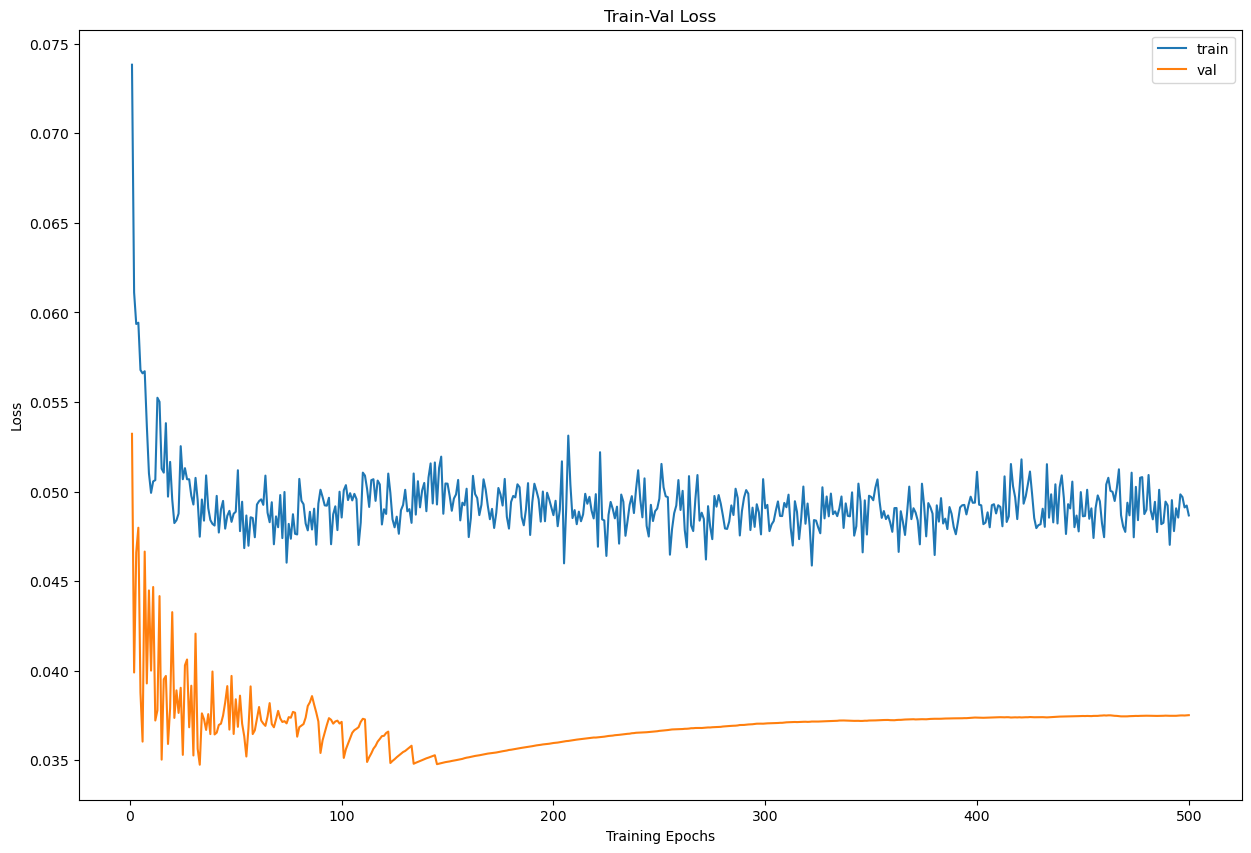

In [432]:
num_epochs = params_train["num_epochs"]
plt.title("Train-Val Loss")
plt.plot(range(1, num_epochs + 1), loss_hist["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_hist["val"], label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

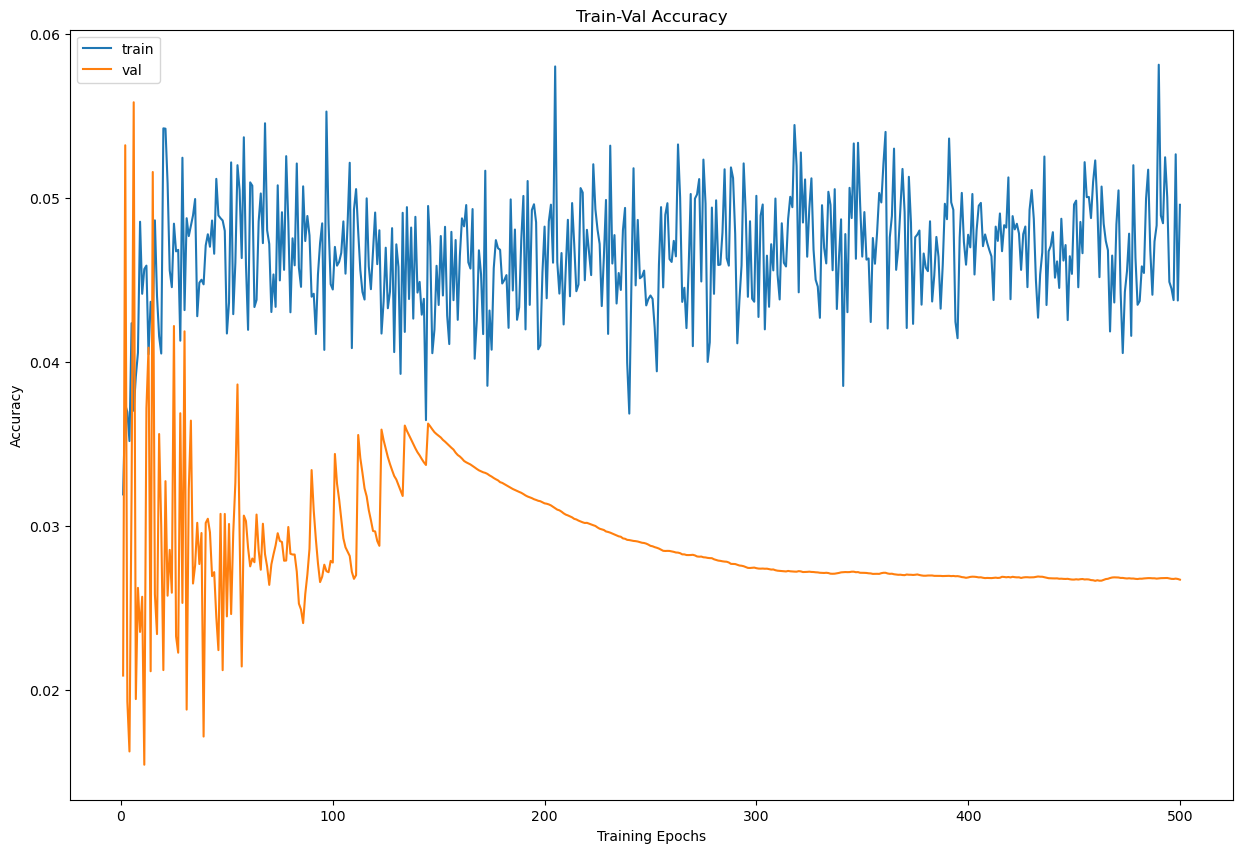

In [433]:
plt.title("Train-Val Accuracy")
plt.plot(range(1, num_epochs + 1), metric_hist["train"], label="train")
plt.plot(range(1, num_epochs + 1), metric_hist["val"], label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [434]:
# deploy the model
params_model = {
    "input_shape": (1, 192, 192),
    "initial_filters": 16,
    "num_outputs": 4,
}
model = Net(params_model)
model.eval()

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(17, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(49, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(113, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(241, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout): Dropout(p=0.15, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (fc5): Linear(in_features=16, out_features=4, bias=True)
  (fc6): Linear(in_features=16, out_features=3, bias=True)
)

In [435]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    model = model.to(device)

In [436]:
path2weights = "models/weights_smoothl1.pt"
model.load_state_dict(torch.load(path2weights))

<All keys matched successfully>

In [437]:
loss_func = nn.SmoothL1Loss(reduction="sum")
with torch.no_grad():
    loss, metric = loss_epoch(model, loss_func, val_dl)
    print(loss, metric)

TypeError: 'SmoothL1Loss' object is not subscriptable

In [462]:
from PIL import ImageDraw
import numpy as np
import torchvision.transforms.functional as tv_F

np.random.seed(0)
import matplotlib.pylab

%matplotlib inline

In [463]:
def show_tensor_2labels(img, label1, label2):
    label1 = rescale_label(label1, img.shape[1:])
    label2 = rescale_label(label2, img.shape[1:])
    img = tv_F.to_pil_image(img)
    cx, cy, w, h = label1
    draw = ImageDraw.Draw(img)
    draw.rectangle(
        ((cx - w / 2, cy - h / 2), (cx + w / 2, cy + h / 2)), outline="green", width=2
    )
    cx, cy, w, h = label2
    draw.rectangle(
        ((cx - w / 2, cy - h / 2), (cx + w / 2, cy + h / 2)), outline="red", width=2
    )
    plt.imshow(np.asarray(img), cmap="gray")

In [464]:
rndInds = np.random.randint(len(val_ds), size=10)
print(rndInds)

[ 0  3  3 39  9 19 21 36 23  6]


[25 13  8  9 20 16  5 15  0 18]


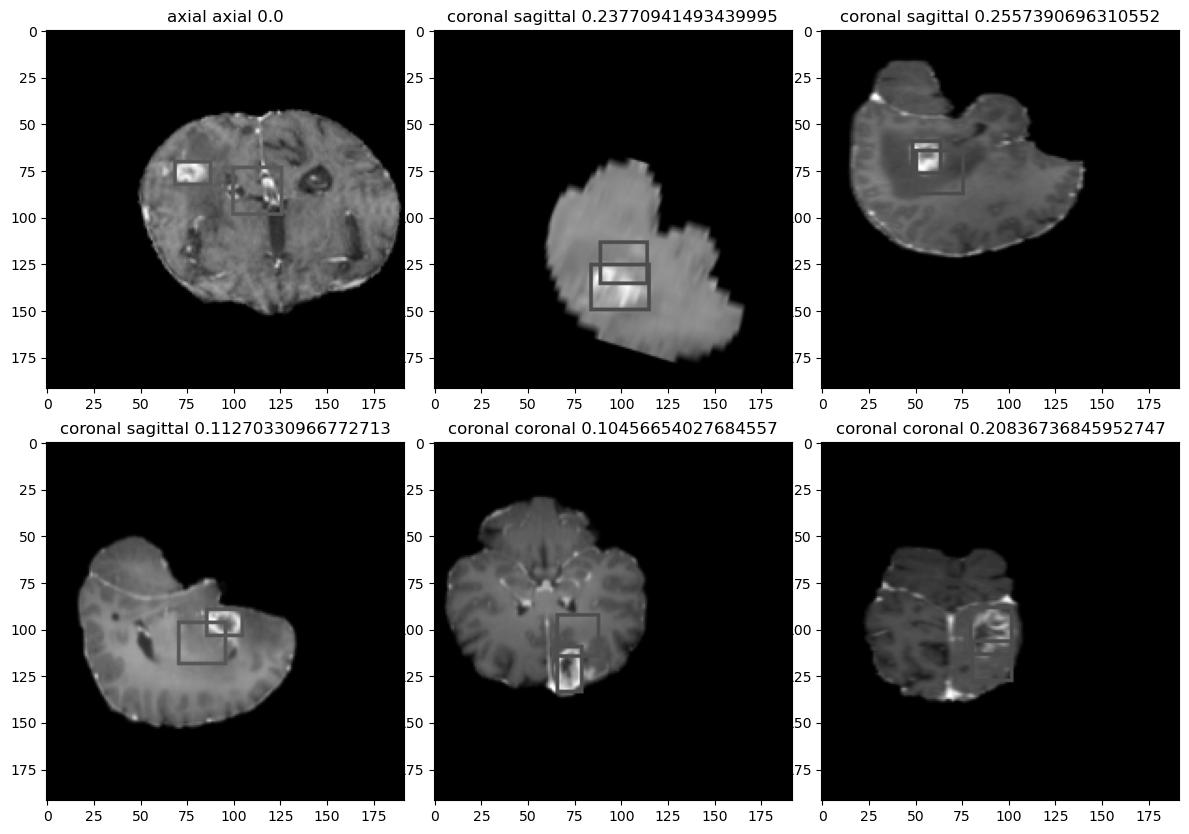

In [466]:
classes = [
    "axial",
    "coronal",
    "sagittal",
]

rndInds = np.random.randint(len(val_ds), size=10)
print(rndInds)

plt.rcParams["figure.figsize"] = (15, 10)
plt.subplots_adjust(wspace=0.0, hspace=0.15)
for i, rndi in enumerate(rndInds):
    img, label = val_ds[rndi]
    h, w = img.shape[1:]
    with torch.no_grad():
        label_pred = model(img.unsqueeze(0).to(device))[0].cpu()
    plt.subplot(2, 3, i + 1)
    show_tensor_2labels(img, label[:-1], label_pred[:-3])
    # calculate IOU
    # img = tv_F.to_pil_image(img)
    # plt.imshow(np.asarray(img), cmap="gray")
    label_bb = bbox(torch.tensor(label[:-1]).unsqueeze(0))
    label_pred_bb = bbox(label_pred[:-3].unsqueeze(0))
    iou = torchvision.ops.box_iou(label_bb, label_pred_bb)
    predicted, actual = classes[label_pred[:-3].argmax(0)], classes[int(label[-1])]
    plt.title(f"{predicted} {actual} {iou.item()}")
    if i > 4:
        break

    # outputs = net(images)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, params):
        super().__init__()
        C_in, H_in, W_in = params["input_shape"]
        init_f = params["initial_filters"]
        num_outputs = params["num_outputs"]
        self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3, stride=2, padding=1)
        #         self.bn1 = nn.BatchNorm2d(init_f)
        #         the input of each layer will be the output of previous layer along with an skip
        #         connection from the input layer of the previous layer
        self.conv2 = nn.Conv2d(
            init_f + C_in, 2 * init_f, kernel_size=3, stride=1, padding=1
        )
        #         self.bn2 = nn.BatchNorm2d(2*init_f)
        self.conv3 = nn.Conv2d(3 * init_f + C_in, 4 * init_f, kernel_size=3, padding=1)
        #         self.bn3 = nn.BatchNorm2d(4*init_f)
        self.conv4 = nn.Conv2d(7 * init_f + C_in, 8 * init_f, kernel_size=3, padding=1)
        #         self.bn4 = nn.BatchNorm2d(8*init_f)
        self.conv5 = nn.Conv2d(
            15 * init_f + C_in, 16 * init_f, kernel_size=3, padding=1
        )
        #         self.bn5 = nn.BatchNorm2d(16*init_f)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * init_f, num_outputs)
        self.fc2 = nn.Linear(16 * init_f, 3)

    def forward(self, x):
        # the following applies avg_pool2d with a kernel of (4, 4) and stride of (4, 4)
        identity = F.avg_pool2d(x, 4, 4)
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        identity = F.avg_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        identity = F.avg_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        identity = F.avg_pool2d(x, 2, 2)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        x = F.relu(self.conv5(x))
        x = F.adaptive_avg_pool2d(x, 1)
        #         x = x.reshape(x.size(0), -1)
        x = self.flatten(x)
        #         or torch.flatten() could be used

        # y = self.fc1(x)
        z = self.fc2(x)
        # print(y)
        # print(z)
        # print(torch.concatenate((y, z), axis=1))
        # return torch.concatenate((y, z), axis=1) #y + z
        return z


params_model = {"input_shape": (1, 192, 192), "initial_filters": 16, "num_outputs": 3}

net = Net(params_model)
net = net.to(device)

In [ ]:
print(net)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(17, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(49, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(113, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(241, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=256, out_features=3, bias=True)
  (fc2): Linear(in_features=256, out_features=3, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
opt = optim.Adam(net.parameters(), lr=1e-4)

# training the model
lr_scheduler = ReduceLROnPlateau(opt, mode="min", factor=0.5, patience=20, verbose=1)

path2models = "models/"
if not os.path.exists(path2models):
    os.mkdir(path2models)

params_train = {
    "num_epochs": 50,
    "optimizer": opt,
    "loss_func": criterion,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models + "weights_smoothl1.pt",
}

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dl, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print(inputs)
        # yb = torch.stack(yb, 1)
        # yb = yb.type(torch.float32).to(device)
        # output = model(xb.to(device))
        # loss_b, metric_b = loss_batch(loss_func, output, yb, opt)
        # for xb, yb in dataset_dl:
        # yb = torch.stack(yb, 1)
        # yb = yb.type(torch.float32).to(device)
        # output = model(xb.to(device))
        # loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        labels = torch.stack(labels, 1)
        labels = labels[:, -1]
        labels = labels.type(torch.LongTensor)
        # print(outputs)
        # print(labels)
        loss = criterion(outputs, labels)
        loss.backward()
        opt.step()

        # print statistics
        running_loss += loss.item()
        print(running_loss)
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}")
            running_loss = 0.0

print("Finished Training")

1.1045856475830078
2.2010855674743652
3.303666114807129
4.3931626081466675
5.47982394695282
6.568381190299988
7.673698782920837
8.8315749168396
9.940280199050903
11.026248455047607
12.141178011894226
13.237949013710022
14.367179274559021
15.470578074455261
16.57531452178955
17.67331099510193
18.767513871192932
19.859153032302856
20.947449326515198
22.057137608528137
23.14434027671814
24.234171628952026
25.33034086227417
26.405991196632385
27.490819692611694
28.55432116985321
29.623180508613586
30.758707761764526
31.882327556610107
32.94792973995209
34.02955627441406
35.09376037120819
36.21862733364105
37.29574131965637
38.37311327457428
39.474595069885254
40.58167314529419
41.65326106548309
42.736899971961975
43.76969122886658
44.80654966831207
45.899112939834595
46.909404158592224
47.97646641731262
49.0782630443573
50.194172859191895
51.26294219493866
52.45767390727997
53.5011568069458
54.5569908618927
55.61187255382538
56.643749713897705
57.68538057804108
58.67455214262009
59.6620982

In [ ]:
import copy


def train_val(model, params):
    num_epochs = params["num_epochs"]
    loss_func = params["loss_func"]
    opt = params["optimizer"]
    train_dl = params["train_dl"]
    val_dl = params["val_dl"]
    sanity_check = params["sanity_check"]
    lr_scheduler = params["lr_scheduler"]
    path2weights = params["path2weights"]
    # keep track of loss and metric values
    loss_history = {"train": [], "val": []}
    # metric_history = {
    #     "train": [],
    #     "val": []
    # }
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float("inf")
    # epochs
    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print(f"Epoch {epoch}/{num_epochs - 1}, current lr = {current_lr}")
        model.train()
        train_loss = loss_epoch2(model, loss_func, train_dl, sanity_check, opt)
        loss_history["train"].append(train_loss)
        # metric_history["train"].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss = loss_epoch2(model, loss_func, val_dl, sanity_check)
            loss_history["val"].append(val_loss)
            # metric_history["val"].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print("The best model updated!")

        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts)

        print(f"train loss: {train_loss: .6f}")
        print(f"val loss: {val_loss: .6f}")
        print("-" * 10)

    model.load_state_dict(best_model_wts)
    return model, loss_history  # , metric_history

In [ ]:
net, loss_hist = train_val(net, params_train)

Epoch 0/49, current lr = 6.25e-06
The best model updated!
train loss:  0.090821
val loss:  0.050198
----------
Epoch 1/49, current lr = 6.25e-06
The best model updated!
train loss:  0.089504
val loss:  0.049580
----------
Epoch 2/49, current lr = 6.25e-06
The best model updated!
train loss:  0.088121
val loss:  0.048997
----------
Epoch 3/49, current lr = 6.25e-06
The best model updated!
train loss:  0.087251
val loss:  0.048563
----------
Epoch 4/49, current lr = 6.25e-06
The best model updated!
train loss:  0.085226
val loss:  0.047758
----------
Epoch 5/49, current lr = 6.25e-06
The best model updated!
train loss:  0.084136
val loss:  0.047302
----------
Epoch 6/49, current lr = 6.25e-06
The best model updated!
train loss:  0.083423
val loss:  0.046747
----------
Epoch 7/49, current lr = 6.25e-06
The best model updated!
train loss:  0.081582
val loss:  0.046409
----------
Epoch 8/49, current lr = 6.25e-06
The best model updated!
train loss:  0.080743
val loss:  0.045869
----------
E

In [452]:
# model(img)#.unsqueeze(0).to(device))[0].cpu()
model(img.to(device))

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 16 but got size 1 for tensor number 1 in the list.

[35 24 29 19 19 14 39 32  1  9]


AttributeError: shape

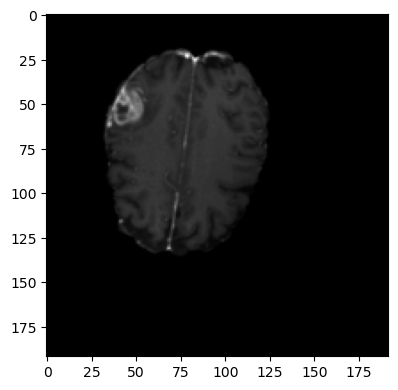

In [454]:
# outputs = net(images)
classes = [
    "axial",
    "coronal",
    "sagittal",
]

rndInds = np.random.randint(len(val_ds), size=10)
print(rndInds)
for i, rndi in enumerate(rndInds):
    img, label = val_ds[rndi]
    h, w = img.shape[1:]
    with torch.no_grad():
        # outputs = model(img.unsqueeze(0).to(device))[0].cpu()
        label_pred = model(img.unsqueeze(0).to(device))[0].cpu()
    plt.subplot(2, 3, i + 1)
    img = tv_F.to_pil_image(img)
    plt.imshow(np.asarray(img), cmap="gray")
    # print(label_pred, label)
    show_tensor_2labels(img, label[:-1], label_pred[:-3])
    # calculate IOU
    label_bb = bbox(torch.tensor(label[:-1]).unsqueeze(0))
    label_pred_bb = bbox(label_pred[:-3].unsqueeze(0))
    iou = torchvision.ops.box_iou(label_bb, label_pred_bb)
    # print(outputs)
    # print(outputs.argmax(0))
    # print(torch.max(outputs, 0))
    predicted, actual = classes[outputs.argmax(0)], classes[int(label[-1])]
    plt.title(f"{predicted} {actual}")
    if i > 4:
        break

In [ ]:
outputs = net(val_dl)

TypeError: avg_pool2d(): argument 'input' (position 1) must be Tensor, not DataLoader

In [ ]:
_, predicted = torch.max(outputs, 0)

print("Predicted: ", " ".join(f"{classes[predicted[j]]}" for j in range(2)))

IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in val_dl:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 0)
        # collect the correct predictions for each class
        for label, prediction in zip(labels[-1], predictions):
            label = int(label.item())
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

Accuracy for class: axial is 0.0 %
Accuracy for class: coronal is 27.3 %
Accuracy for class: sagittal is 20.0 %
